# Numerische Lösung von Anfangswertproblemen

In [55]:
using Plots
using DifferentialEquations

## Einführung

Beispiel: Gesucht ist eine Funktion $y: \mathbb{R} \to \mathbb{R}$ für die gilt:

$$y'(x) = 2 x \cdot y(x), \quad y(0) = 1.$$

Für jedes $x$ soll also die Ableitung $y'(x)$  gleich $2$ mal dem Funktionswert $y(x)$ sein. Gleichzeitig ist vorgegeben, dass $y$ an der Stelle $x=0$ den Wert $y(0) = 1$  annimmt. Wie sich durch Einsetzen leicht überprüfen lässt, löst die Funktion

$$y(x) = \exp(x^2)$$

diese Aufgabe. 

Es sind also

* eine Differentialgleichung (ordinary differential equation), die eine Beziehung zwischen $y'(x)$ und $x$ sowie $y(x)$ herstellt sowie

* Anfangswerte $x_0$ und $y_0$ für die $y(x_0) = y_0$ gelten soll

gegeben. Gesucht ist eine Funktion, die beide Bedingungen erfüllt. Eine solche Aufgabenstellung heißt Anfangswertproblem (initial value problem). 

Dass es im Beispiel gelingt, eine exakte Lösung zu finden ist nicht die Regel. Man wird daher auf numerische Lösungsverfahren zurückgreifen müssen.

Anmerkungen:
 
* Die Lösung solcher Anfangswertprobleme ist von großer praktischer Bedeutung (Wettervorhersage, Berechnung von Schwingungen, Ausbreitung von Infektionskrankheiten und vieles mehr)

* Es existieren eine Vielzahl verschiedener Lösungsverfahren mit einer umfangreichen mathematischen Theorie (zum Beispiel das [Standardwerk](https://www.degruyter.com/document/doi/10.1515/9783110316360/html?lang=de) von Deuflhard und Bornemann)

* Wir kratzen hier nur ein bisschen an der Oberfläche


## Numerische Lösung bei einer unbekannten Funktion

### Schreibweise: Funktion der Differentialgleichung

Wir beginnen damit, eine sehr hilfreiche Schreibweise einzuführen. Hierzu machen wir uns klar, dass die Differentialgleichung im Beispiel oben auch als Vorschrift gelesen werden kann, mit deren Hilfe wir die Ableitung $y'(x)$ berechnen können, wenn $x$ und $y(x)$ gegeben sind. Ohne die Lösungsfunktion zu kennen, können wir mithilfe der Anfangswerte $x_0 = 0$ und $y_0 = 1$ sofort angeben, dass

$$
y'(0) = 2 \cdot 0 \cdot 1 = 0
$$

gelten muss. Die Ableitung $y'(0)$ hängt also nur von den zwei Zahlen $x=0$ und $y(0) = 1$ ab. Den Zusammenhang können wir mithilfe der Funktion $F: \mathbb{R}^2 \to \mathbb{R}$ mit

$$
F(x, y) = 2xy
$$

zum Ausdruck bringen. Unsere Differentialgleichung können wir damit in der Form

$$
y'(x) = F(x, y(x)) = 2x \cdot y(x)
$$

aufschreiben. 

Wir sehen: Eine Differentialgleichung lässt sich in einer Funktion $F$ ausdrücken, die zwei Zahlen $x, y$ eine neue Zahl $F(x, y)$ zuordnet. Wir nennen $F$ die Funktion der Differentialgleichung.

Wir lösen das Anfangswertproblem nun numerisch mit einem sehr rudimentären Verfahren und mit einer Python-Funktion. 

Hierzu benötigen wir die Funktion der DGL

In [7]:
F(x, y) = 2 * x * y;

und die exakte Lösung zum Vergleich

In [8]:
xr = LinRange(0, 1, 20)
yr = exp.(xr.^2);

### Euler-Verfahren

Ein sehr einfaches numerisches Verfahren zur Lösung von Anfangswertproblemen ist das eulersche Polygonzugverfahren (auch: Euler-Vorwärts), das ausgehend von den Anfangswerten $x_0, y_0$ und einer Schrittweite $h$ die Näherungsösung nach dem Schema

$$
x_{n+1} = x_n + h, \quad y_{n+1} = y_n + h \cdot F(x_n, y_n)
$$

berechnet. Hier die Umsetzung in Julia:

In [33]:
function euler(F, I, y0, h)
    n = ceil(Int, (I[2] - I[1]) / h + 1)
    x = I[1].+h*(0:n-1)
    y = zeros(n)
    y[1] = y0
    for i ∈ 1:n-1
        y[i+1] = y[i] + h * F(x[i], y[i])
    end
    return x, y
end

euler (generic function with 1 method)

Damit bestimmen wir die Näherungslösungen für zwei verschiedene Schrittweiten

In [40]:
xe1, ye1 = euler(F, [0, 1], 1, 0.2);
xe2, ye2 = euler(F, [0, 1], 1, 0.02);

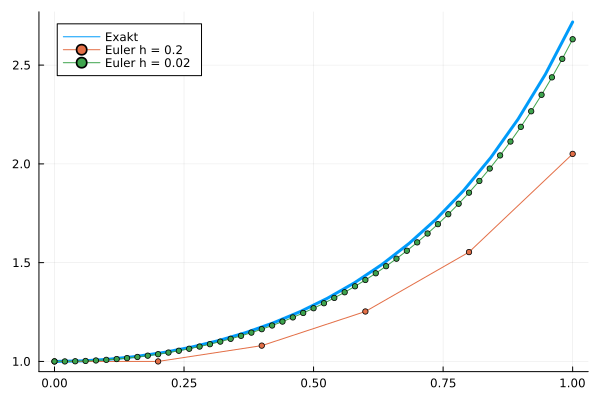

In [54]:
plot(xr, yr, linewidth=3, label = "Exakt", legend=:topleft)
plot!(xe1, ye1, markershape=:circle, markersize=3, label="Euler h = 0.2")
plot!(xe2, ye2, markershape=:circle, markersize=3, label = "Euler h = 0.02")

### Näherungsverfahren in DifferentialEquations

In `DifferentialEquations` (oben importiert) gibt es eine einheitliche Schnittstelle zu verschiedenen numerischen Verfahren darstellt. Standardmäßig wird ein adaptives Verfahren mit automatischer Schrittweitensteuerung verwendet. 

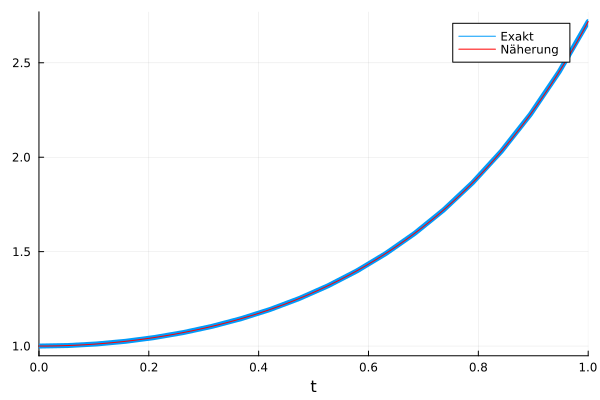

In [68]:
F(y, p, x) = 2 * x * y;

p = ODEProblem(F, 1, [0, 1]);
s = solve(p);

plot(xr, yr, linewidth=5, label="Exakt")
plot!(s, color=:red, label="Näherung")

## Systeme von Differentialgleichungen

In der Praxis gibt es häufig mit Aufgaben, die auf Systeme von Differentialgleichungen führen. Ein Beispiel ist das System

$$
\begin{array}{rcl}
  \dot y_1(t) &=& a \cdot (y_2(t) - y_1(t))\\
  \dot y_2(t) &=& y_1(t) \cdot (b - y_3(t)) - y_2(t)\\
  \dot y_3(t) &=& y_1(t) \cdot y_2(t) - c \cdot y_3(t)
\end{array}
$$

in dem die Ableitungen von drei Funktionen jeweils von den Funktionswerten aller Funktionen abhängen. Dabei sind $a, b, c$ vorgegebene Zahlenwerte. In diesem Fall ordnet die Abbildung $\mathbf{F}: \mathbb{R} \times \mathbb{R}^3 \to \mathbb{R}^3$ der Zeit $t$ und den drei Funktionswerten $y_1(t), y_2(t), y_3(t)$ die zeitlichen Ableitungen $\dot y_1(t), \dot y_2(t), \dot y_3(t)$ zu. Wir fassen das in einem Vektor zusammen und erhalten die Schreibweise

$$
\mathbf{F}(t, \mathbf{y}) =
\left(
\begin{array}{c}
a \cdot (y_2 - y_1) \\
y_1 \cdot (b - y_3) - y_2 \\
y_1 \cdot y_2 - c \cdot y_3
\end{array}
\right),
$$

bei der wir uns nicht davon irritieren lassen, dass $t$ gar nicht rechts vom Gleichheitszeichen auftaucht. In diesem Beispiel ist der Funktionswert unabhängig von $t$ (man sagt, das System ist autonom), im Allgemeinen ist das jedoch nicht der Fall.
Damit können wir das Anfangswertproblem für gegebene Werte $a, b, c$ und eine Anfangsbedingung $t_0$ und $\mathbf{y}_0$ näherungsweise lösen.

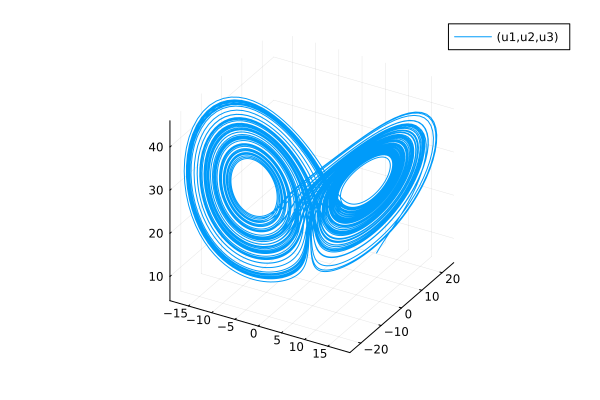

In [102]:
# Funktion der DGL
F(y, p, t) = [
        10 * (y[2] - y[1]),
        y[1] * (28 - y[3]) - y[2],
        y[1] * y[2] - 8 / 3 * y[3]
    ]

# Anfangswert
y0 = [10, 10, 10]

# Problem
p = ODEProblem(F, y0, [0, 100]);

# Näherungslösung
s = solve(p);

# Plot
plot(s, idxs=(1, 2, 3))

Anmerkung: Dieses Beispiel ist die so genannte Lorenzgleichung, die eng mit dem Schlagwort des [Schmetterlingseffekts](https://de.wikipedia.org/wiki/Schmetterlingseffekt) verbunden ist.

## Steife Differentialgleichungen

Als Beispiel betrachten wir den Van der Pol Oszillator (ein Problem aus der Elektrotechnik) der auf das Anfangswertproblem

$$
  \begin{array}{rcl}
    \dot y_1(t) & = & y_2(t) \\[1ex]
    \dot y_2(t) & = & 1000 \cdot (1-y_1(t)^2) \cdot y_2(t) - y_1(t)
  \end{array}
\quad \text{und} \quad
\mathbf{y}(0) = 
\left(\begin{array}{c}2\\0\end{array}\right)
$$

führt.

N = 582

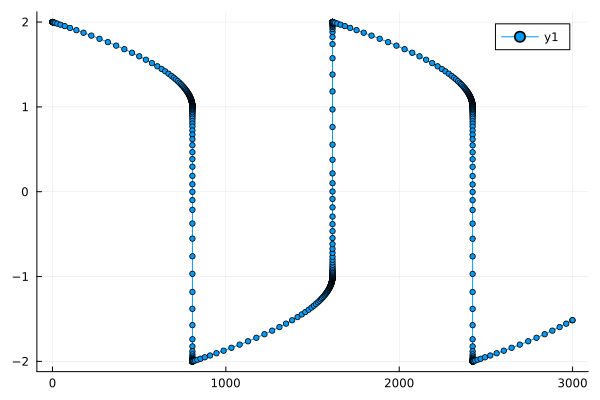

In [93]:
# Funktion der DGL
F(y, p, t) = [
    y[2],
    1000 * (1 - y[1]^2) * y[2] - y[1]
]

# Anfangswert
y0 = [2, 0]

# Problem
p = ODEProblem(F, y0, [0, 3000])

# Näherungslösung
s = solve(p)

# Ausgabe
print("N = ", length(s))
plot(s.t, s[1, :], markershape=:circle, markersize=3)

Das Standardverfahren funktioniert hier sehr gut, die Funktion `solve_ivp` aus dem Python scipy Paket berechnet für diese Problem mehr als 1.5 Millionen Schritte, in Matlab ist Situation noch schlechter. 

Es geht aber auch in Julia noch ein bisschen besser, und zwar wenn man dem Lösungsverfahren einen Tipp gibt und dazusagt, dass es sich um eine steife Differentialgleichung handelt.

N = 300

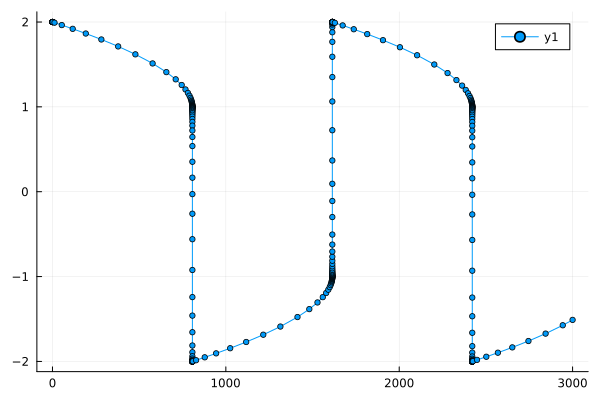

In [95]:
# Näherungslösung
s = solve(p, alg_hints=[:stiff])

# Ausgabe
print("N = ", length(s))
plot(s.t, s[1, :], markershape=:circle, markersize=3)

Der Unterschied in Rechenzeit ist vernachlässigbar, es wird aber eine etwas geringere Anzahl von Schritten benötigt.

Anmerkungen:

* Der Begriff 'steife Differentialgleichung' wird in der Literatur nicht einheitlich verwendet. Vereinfacht kann man sagen, dass eine DGL steif ist, wenn explizite Verfahren nicht gut funktionieren

* Steife DGLn lassen sich häufig mit impliziten Verfahren (zum Beispiel BDF) besser lösen. Bei impliziten Verfahren steht in der Iterationsvorschrift das Ergebnis am Ende des Zeitschritts auch rechts vom Gleichheitszeichen, weshalb ein i.Allg. nichtlineares Gleichungssystem gelöst werden muss.

## Differentialgleichungen mit Massenmatrix

Besitzt das System von Differentialgleichungen die Form

$$
\mathbf{M} \dot{\mathbf{y}}(t) = \mathbf{F}(t, \mathbf{y}(t))
$$

dann wird die Matrix $\mathbf{M}$ Massenmatrix genannt. Hierzu ein konkretes Beispiel, das den Temperaturausgleich zwischen zwei Körpern unterschiedlicher Anfangstemperatur beschreibt:

$$
\left(
\begin{array}{cc}
3000 & 0 \\ 
0 & 3000
\end{array}
\right)
\left(
\begin{array}{c}
\dot \theta_1 \\
\dot \theta_2
\end{array}
\right)
=
-
\left(
\begin{array}{rr}
1 & -1 \\ 
-1 & 1
\end{array}
\right)
\left(
\begin{array}{c}
\theta_1 \\
\theta_2
\end{array}
\right)
\quad \text{und} \quad
\theta(0) = 
\left(
\begin{array}{c}
10 \\ 0
\end{array}
\right)
$$

Hier die beiden Matrizen:

In [97]:
M = [3000 0; 0 3000];
K = [1 -1; -1 1];

Mit `DifferentialEquations` kann man diese spezielle Form einer Differentialgleichung mithlfe von `ODEFunction` definieren, wenn die Massenmatrix mit angegeben wird. Man hätte natürlich auch die DGL mit der Inversen der Massenmatrix durchmultiplizieren können.

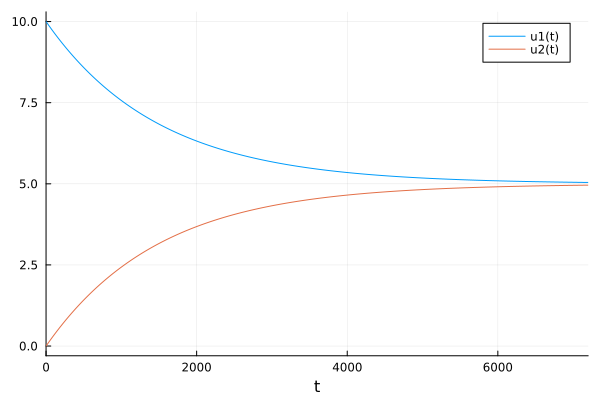

In [105]:
F(y, p, t) = -K * y
FM = ODEFunction(F, mass_matrix=M)
p = ODEProblem(FM, [10; 0], [0, 2 * 3600])
s = solve(p)
plot(s)